In [1]:
import numpy as np
import scipy.linalg as la

def simple_bipartite_matching(adjacency_matrix):
    n = adjacency_matrix.shape[1]  # Number of columns (vertices in one partition)
    B = np.linalg.inv(adjacency_matrix)
    M = []  # Initialize the matching as an empty list

    for c in range(n):
        # Find an unmatched row (r) such that B[r, c] == 0
        r_candidates = [r for r in range(n) if B[r, c] == 0]

        if len(r_candidates) > 0:
            r = r_candidates[0]  # Select the first unmatched row
            M.append((c, r))  # Add the edge (u_c, v_r) to the matching

            # Eliminate the r-th row and the c-th column of B
            B = np.delete(B, r, axis=0)
            B = np.delete(B, c, axis=1)

    return M




In [2]:
# Complete bipartite is singular. Non-invertible.
"""
from networkx.algorithms import bipartite
n1 = 10
n2 = 10

G = bipartite.complete_bipartite_graph(n1, n2)
"""

'\nfrom networkx.algorithms import bipartite\nn1 = 10\nn2 = 10\n\nG = bipartite.complete_bipartite_graph(n1, n2)\n'

In [3]:
from networkx.algorithms import bipartite
#random_graph(n, m, p[, seed, directed])
n = 20
m = 20
p = 0.6
seed = 1
directed = False
G = bipartite.random_graph(n, m, p, seed, directed)

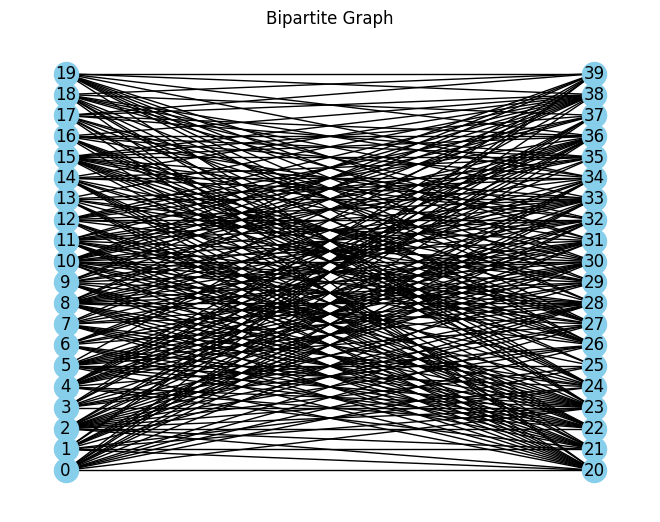

In [4]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# Get the nodes in each partition
partition1_nodes, partition2_nodes = bipartite.sets(G)
# Use bipartite_layout for bipartite graph visualization
pos = nx.bipartite_layout(G, partition1_nodes)
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=300)
plt.title("Bipartite Graph")
plt.show()

In [5]:
# Convert the graph to a SciPy sparse matrix
mat = nx.to_scipy_sparse_array(G,format="csc")

# Print the SciPy sparse matrix (in Compressed Sparse Column format, CSC)
print(mat)

  (20, 0)	1
  (23, 0)	1
  (25, 0)	1
  (26, 0)	1
  (27, 0)	1
  (28, 0)	1
  (30, 0)	1
  (32, 0)	1
  (33, 0)	1
  (34, 0)	1
  (36, 0)	1
  (37, 0)	1
  (39, 0)	1
  (20, 1)	1
  (21, 1)	1
  (23, 1)	1
  (24, 1)	1
  (28, 1)	1
  (31, 1)	1
  (32, 1)	1
  (33, 1)	1
  (34, 1)	1
  (38, 1)	1
  (39, 1)	1
  (20, 2)	1
  :	:
  (18, 37)	1
  (1, 38)	1
  (4, 38)	1
  (7, 38)	1
  (8, 38)	1
  (9, 38)	1
  (10, 38)	1
  (11, 38)	1
  (12, 38)	1
  (13, 38)	1
  (14, 38)	1
  (15, 38)	1
  (16, 38)	1
  (17, 38)	1
  (19, 38)	1
  (0, 39)	1
  (1, 39)	1
  (3, 39)	1
  (5, 39)	1
  (8, 39)	1
  (9, 39)	1
  (10, 39)	1
  (17, 39)	1
  (18, 39)	1
  (19, 39)	1


In [6]:
# Set the random seed to 13
np.random.seed(13)

# Get the number of non-zero elements (nnz) in the matrix
nnz = mat.nnz

# Multiply the data array in place by random integers between 0 and nnz
random_integers = np.random.randint(1, nnz + 1, size=nnz)
mat.data *= random_integers

# Print the modified SciPy sparse matrix (in CSC format)
print(mat)

  (20, 0)	339
  (23, 0)	177
  (25, 0)	75
  (26, 0)	17
  (27, 0)	231
  (28, 0)	355
  (30, 0)	245
  (32, 0)	154
  (33, 0)	237
  (34, 0)	443
  (36, 0)	484
  (37, 0)	411
  (39, 0)	245
  (20, 1)	127
  (21, 1)	451
  (23, 1)	431
  (24, 1)	439
  (28, 1)	230
  (31, 1)	462
  (32, 1)	75
  (33, 1)	330
  (34, 1)	332
  (38, 1)	309
  (39, 1)	259
  (20, 2)	161
  :	:
  (18, 37)	167
  (1, 38)	101
  (4, 38)	89
  (7, 38)	428
  (8, 38)	142
  (9, 38)	212
  (10, 38)	76
  (11, 38)	37
  (12, 38)	26
  (13, 38)	23
  (14, 38)	376
  (15, 38)	442
  (16, 38)	155
  (17, 38)	319
  (19, 38)	410
  (0, 39)	212
  (1, 39)	132
  (3, 39)	313
  (5, 39)	75
  (8, 39)	110
  (9, 39)	18
  (10, 39)	54
  (17, 39)	480
  (18, 39)	170
  (19, 39)	430


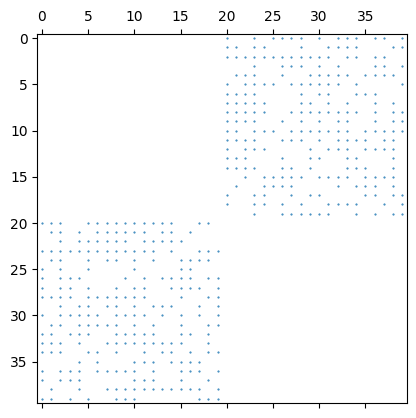

In [7]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(mat, aspect='equal', marker='.', markersize=1)

In [8]:
"""

import scipy.sparse as sps
import numpy as np

# Get the number of rows in the CSC matrix
num_rows = mat.shape[0]

# Initialize a list to store the invertibility results
invertibility_results = []

# Iterate over all rows
for row_index in range(num_rows):
    # Explicitly select the columns for the row using indices
    cols_to_select = [col for col in range(mat.shape[1]) if mat[row_index, col] != 0]
    
    # Slice the submatrix using explicit indices
    submatrix = mat[:, cols_to_select].tocsc()

    # Attempt to invert the submatrix
    try:
        inv_submatrix = sps.linalg.inv(submatrix)
        invertibility_results.append(True)
    except sps.linalg.LinAlgError:
        invertibility_results.append(False)

# Print the invertibility results for each row
for row_index, is_invertible in enumerate(invertibility_results):
    print(f"Row {row_index}: {'Invertible' if is_invertible else 'Not Invertible'}")
"""

'\n\nimport scipy.sparse as sps\nimport numpy as np\n\n# Get the number of rows in the CSC matrix\nnum_rows = mat.shape[0]\n\n# Initialize a list to store the invertibility results\ninvertibility_results = []\n\n# Iterate over all rows\nfor row_index in range(num_rows):\n    # Explicitly select the columns for the row using indices\n    cols_to_select = [col for col in range(mat.shape[1]) if mat[row_index, col] != 0]\n    \n    # Slice the submatrix using explicit indices\n    submatrix = mat[:, cols_to_select].tocsc()\n\n    # Attempt to invert the submatrix\n    try:\n        inv_submatrix = sps.linalg.inv(submatrix)\n        invertibility_results.append(True)\n    except sps.linalg.LinAlgError:\n        invertibility_results.append(False)\n\n# Print the invertibility results for each row\nfor row_index, is_invertible in enumerate(invertibility_results):\n    print(f"Row {row_index}: {\'Invertible\' if is_invertible else \'Not Invertible\'}")\n'

In [9]:
invMat = scipy.sparse.linalg.inv(mat)

In [21]:

import scipy.sparse as sps
import numpy as np

# Get the number of rows in the CSC matrix
num_rows = mat.shape[0]
num_cols = mat.shape[1]

# Initialize a list to store the invertibility results
invertibility_results = []
print(mat.data)
# Iterate over all rows
for c in range(num_rows):
    # Explicitly select the columns for the row using indices
    cols_to_select = [col for col in range(invMat.shape[1]) if invMat[c, col] != 0]
    rows_to_select = [row for row in range(mat.shape[0]) if mat[row,c] != 0]

    print(c)
    print(cols_to_select)
    print(rows_to_select)
    eligible_rows = set(rows_to_select) & set(cols_to_select)
    print(eligible_rows)
    if (len(eligible_rows)>0):
        row_to_remove = eligible_rows.pop()
        print(row_to_remove)
        # Create row index arrays for the slices, excluding the row to skip
        row_indices = np.delete(np.arange(invMat.shape[0]), row_to_remove)
        col_indices = np.delete(np.arange(invMat.shape[1]), c)

        print(invMat.shape)
        # Extract a submatrix

        newInvMatCol = invMat[:, col_indices]
        print(newInvMatCol.shape)
        newInvMatRow = newInvMatCol[row_indices, :]
        print(newInvMatRow.shape)


        """
        mat.getrow(row_to_remove)
        mat.getcol(c)
        #print("remove row",row_to_remove)
        # Set the data of row_to_remove to 0 in the mat matrix
        print(mat.data)
        mat.data[mat.indptr[row_to_remove]:mat.indptr[row_to_remove+1]] = 0
        # Set the data of row_to_remove to 0 in the invMat matrix
        print(mat.data)
        # Find the range of data indices corresponding to the specified column
        start_idx = mat.indptr[c]
        end_idx = mat.indptr[c + 1]
        # Set the data in the specified column to zero
        mat.data[start_idx:end_idx] = 0
        #print(mat.data)
        """
    """
    # Slice the submatrix using explicit indices
    submatrix = mat[:, cols_to_select].tocsc()

    # Attempt to invert the submatrix
    try:
        inv_submatrix = sps.linalg.inv(submatrix)
        invertibility_results.append(True)
    except sps.linalg.LinAlgError:
        invertibility_results.append(False)
    """
# Print the invertibility results for each row
for row_index, is_invertible in enumerate(invertibility_results):
    print(f"Row {row_index}: {'Invertible' if is_invertible else 'Not Invertible'}")


[339 177  75  17 231 355 245 154 237 443 484 411 245 127 451 431 439 230
 462  75 330 332 309 259 161 404 150 404 140 471  76   2 147 281 413  12
 297 333 315  23 291 181 374 484 390 121 180 379 345 214 306  25 256 114
 430 328 392 124 263 256 244 464 343 167 468 369 139 281 366 279 318 191
 421 223 148 262 257  86 432 218 174 298 245 356 131  82 157 316 329 422
 142 304 390 316  26 370 450 145  27 456  60 411 310 378 240 165 484 279
 482 196  58  51 370 292 277 433 165 445 191 261  92 391 190 340 428   4
 282  17 421 286 410 138 179 451 467 251 458 413 424 281 448 203 370 413
 312  57 105 362 476  48 205 112  49 452 133 344  89 254 370  78 302 379
 439 233 284 373 480  32   2 177 209 104  15 248  90 231 123 302  95  50
 447 480 307   9 103 359  22 259 386 447 187 294 263 352 480 105 174 175
 326 301 423 365 183 252 361 210 212  60  97 329 147 116 283  20 333 433
 146 189 172  73 191 273 326  97 118 229 413 425 432 413  16 381 289 142
 423 466 395 346 352 144 207 478 476 124  21 302 46

In [11]:
from scipy.sparse.linalg import splu
lu = splu(mat)

In [12]:
diagL = lu.L.diagonal()
diagU = lu.U.diagonal()
L,R = lu.L, lu.U
d = diagL.prod()*diagU.prod()

In [13]:
# Lovasz generalized Tutte’s theorem shows that the rank of the Tutte
# matrix gives the size of the maximum matching in the graph.
from scipy.sparse.csgraph import structural_rank
# Rank of Tutte
r = structural_rank(mat)
print("Rank",r)
print("|M|",r//2)
print("determinant",d)


Rank 40
|M| 20
determinant 7.974636892405445e+105
